# 1. Let's import the libraries and the dataset for this analysis.

In [2]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 1000, 'display.width', 1000, 'display.max_rows',1000)

In [3]:
# read data from CSV file
df = pd.read_csv("movies.csv")

# 2. Data Exploration

### 2.1 Print number of rows and columns in the dataset

In [4]:
df.shape

(7668, 15)

There are 7,668 rows and 15 columns. Let's print the first few rows of the dataset.

In [5]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### 2.2 Number of movies in the dataset

In [6]:
len(df['name'])

7668

There are 7668 movies under analysis. 

### 2.3 Find the minimum and maximum release years

In [7]:
min(df['year']), max(df['year'])

(1980, 2020)

Since we have to analyze the data of the movies released in the last 30 years, we will not consider the data of the movies released before 1990.

In [8]:
# filter data using movie release year (>=1990)
df = df[df['year'] >= 1990]

# check rows count of the dataframe after filtering
df.shape

(6025, 15)

### 2.4 Check the missing data in each column

In [9]:
df.isnull().sum()

name           0
rating        61
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           0
country        3
budget      1456
gross         67
company        8
runtime        4
dtype: int64

We can see that there are a few columns with missing data. The column 'budget' contains the most number of missing data. We will drop the rows with the missing data.

In [10]:
df = df.dropna()

In [11]:
# check rows count after dropping the rows with missing data.
df.shape

(4533, 15)

### 2.5 Number of movies released year-wise

In [12]:
df['year'].value_counts()

2002    173
2009    171
2008    171
2005    170
2010    164
2001    164
2006    163
2014    163
2012    162
1999    162
2000    162
2013    161
2011    160
2003    159
2016    158
2004    158
2007    157
2015    156
1997    149
1998    148
1996    144
2018    143
1993    140
1995    138
2017    133
1992    131
1994    128
1991    113
2019    113
1990    111
2020      8
Name: year, dtype: int64

It turns out that maximum number of movies were released during the decade of 2000-2010.

### 2.6 Top grossing movies

Distribution of gross collection of all the movies, 1990 onwards

[]

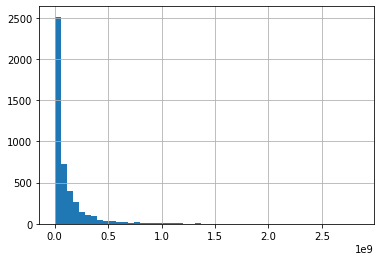

In [13]:
df['gross'].hist(bins = 50).plot()

List of movies with gross collection of one billion dollars and above.

### 2.7 Top movies based on return-on-investment

Let's create a new variable 'ROI' to store return-on-investment values for each movie in the dataset.

In [14]:
df['ROI'] = df['gross']/df['budget']

In [15]:
# top movies based on return-on-investment
df[['name','genre','year','budget','gross','ROI']].sort_values(
    'ROI', ascending = False).head(10)

,name,genre,year,budget,gross,ROI
5114,Paranormal Activity,Horror,2007,15000.0,193355800.0,12890.386667
3459,The Blair Witch Project,Horror,1999,60000.0,248639099.0,4143.984983
6815,The Gallows,Horror,2015,100000.0,42964410.0,429.644100
2093,El Mariachi,Action,1992,7000.0,2040920.0,291.560000
5154,Once,Drama,2007,150000.0,20936722.0,139.578147
2467,Clerks,Comedy,1994,27000.0,3151130.0,116.708519
4471,Napoleon Dynamite,Comedy,2004,400000.0,46138887.0,115.347217
3233,In the Company of Men,Comedy,1997,25000.0,2804473.0,112.178920
4814,Keeping Mum,Comedy,2005,169000.0,18586834.0,109.981266
4304,Open Water,Adventure,2003,500000.0,54683487.0,109.366974


We can see some interesting patterns here. Genres like comedy and horror have huge returns on investment. There is no action, adventure, animation or sci-fi movie even in the top 20.

### 2.8 Count of movies genre-wise

In [16]:
df['genre'].value_counts()

Comedy       1218
Action       1193
Drama         739
Crime         339
Biography     279
Animation     259
Adventure     255
Horror        191
Fantasy        27
Mystery        17
Thriller        5
Romance         4
Sci-Fi          3
Family          3
Western         1
Name: genre, dtype: int64

Top 3 most popular genres in which movies were released : comedy, action, and drama.

### 2.9 Top genres based on number of votes (median)

In [17]:
df.groupby(['genre'])['votes'].median().sort_values(ascending=False)

genre
Action       104000.0
Animation     83000.0
Sci-Fi        75000.0
Mystery       69000.0
Adventure     65000.0
Horror        65000.0
Biography     55000.0
Crime         51000.0
Drama         51000.0
Comedy        43000.0
Fantasy       43000.0
Family        27000.0
Romance       21100.0
Thriller      20000.0
Western        4200.0
Name: votes, dtype: float64

Action genre movies seem to get high number of votes followed by animation and sci-fi genres. Comedy and drama genres are not even in the top 10. 

### 2.10 Top genres based on average score (out of 10)

In [18]:
df.groupby(['genre'])['score'].mean().sort_values(ascending=False)

genre
Biography    7.083154
Drama        6.748579
Crime        6.696755
Mystery      6.670588
Animation    6.664093
Romance      6.475000
Sci-Fi       6.433333
Family       6.300000
Adventure    6.299608
Action       6.257418
Comedy       6.173481
Fantasy      5.977778
Horror       5.765445
Thriller     5.760000
Western      5.500000
Name: score, dtype: float64

The genres biography, drama, and crime are the top three in this list. IMDB rating suggest and show that these genres have been liked by audiences all throughtout the 30 years. 
'Biography' has received the highest score, depicts creative love for this genre. 

### 2.11 Top genres based on budget (median)

In [19]:
df.groupby(['genre'])['budget'].median().sort_values(ascending=False)

genre
Animation    75000000.0
Action       50000000.0
Adventure    33000000.0
Sci-Fi       27000000.0
Mystery      24000000.0
Biography    23000000.0
Comedy       20000000.0
Crime        19000000.0
Family       19000000.0
Romance      19000000.0
Drama        18000000.0
Thriller     13200000.0
Horror       12000000.0
Fantasy      11000000.0
Western      10000000.0
Name: budget, dtype: float64

Genres like animation, action, adventure and sci-fi have the maximum budget most probably due to high spending on CGI and VFX.

### 2.12 Top genres based on gross collection (median)

In [20]:
# median values of 'gross' for each 'genre'
df.groupby(['genre'])['gross'].median().sort_values(ascending=False)

genre
Animation    203172417.0
Action        91490353.0
Adventure     66976317.0
Thriller      52425855.0
Horror        41898409.0
Sci-Fi        40170558.0
Biography     34209066.0
Comedy        32508746.5
Drama         25211175.0
Mystery       23726793.0
Crime         22540359.0
Fantasy       21150265.0
Western       18289763.0
Family        14867514.0
Romance        5481689.0
Name: gross, dtype: float64

If we look at the gross collection of all the movies in the last 30 years, then genres like animation, action, and adventure are at top of the chart.

### 2.13 Top genres based on return-on-investment (median)

In [21]:
# median values of 'ROI' for each 'genre'
df.groupby(['genre'])['ROI'].median().sort_values(ascending=False)

genre
Thriller     4.115395
Sci-Fi       3.819302
Horror       3.192790
Animation    2.952271
Adventure    2.089568
Fantasy      2.060715
Mystery      1.977233
Action       1.913352
Western      1.828976
Comedy       1.773659
Drama        1.642246
Biography    1.479125
Crime        1.363321
Family       0.991168
Romance      0.374200
Name: ROI, dtype: float64

In the list above, it seems that there are more chances of high returns in genres like thriller, sci-fi, and horror. 

### 2.14 Count of movies released in different countries

In [22]:
# percentage of movies released in different countries (1990-2020)
df['country'].value_counts(normalize = True).head(20)

United States     0.791970
United Kingdom    0.088021
France            0.022281
Canada            0.020516
Germany           0.018090
Australia         0.007501
China             0.005736
Japan             0.004853
Hong Kong         0.004633
Ireland           0.004191
New Zealand       0.003530
Spain             0.003530
Italy             0.002868
South Korea       0.002427
Denmark           0.002206
India             0.001765
Mexico            0.001544
Czech Republic    0.001544
Belgium           0.000882
Russia            0.000882
Name: country, dtype: float64

Approximately 92% of the movies were released in United States, United Kingdom, France and Canada.

### 2.15 Average runtime of movies year-wise

In [23]:
df.groupby(['year'])['runtime'].mean().sort_values(ascending=False)

year
2020    119.500000
2019    112.353982
2017    112.315789
2018    111.853147
2016    111.050633
2015    110.993590
2014    110.766871
2013    110.590062
1997    109.590604
1993    109.328571
2005    108.994118
1995    108.876812
2007    108.719745
1999    108.623457
1998    108.506757
2006    108.503067
1996    108.479167
2004    108.360759
2000    108.185185
2012    107.765432
1992    107.748092
2011    107.693750
1991    107.548673
2003    107.540881
1990    107.171171
2009    107.122807
2001    107.097561
1994    107.062500
2010    106.823171
2008    106.280702
2002    105.086705
Name: runtime, dtype: float64

The average runtime is on the rise of late. For example, there is a big difference of 7 minutes between average runtime in 2020 and 2019.

# 3. Subsets of Data

### 3.1 Subset data using name, genre, score, roi and director

Let's take data of the movies that released 2017 onwards and whose budget is or above $100 million.

In [24]:
director_df = df[(df['budget'] >= 100e6) & 
                 (df['year'] >= 2017)][['name','genre','score','director','ROI']]

In [25]:
director_df.head()

,name,genre,score,director,ROI
7043,Thor: Ragnarok,Action,7.9,Taika Waititi,4.744355
7047,Spider-Man: Homecoming,Action,7.4,Jon Watts,5.029525
7048,Blade Runner 2049,Action,8.0,Denis Villeneuve,1.728897
7049,Guardians of the Galaxy Vol. 2,Action,7.6,James Gunn,4.318780
7055,The Fate of the Furious,Action,6.6,F. Gary Gray,4.944020


Analysis for recent years shows that Jon Watta and F. Gary Gray as promising directors with high ROI. And there genres has been "Action". 

### 3.2 Subset data using name,genre, ROI and Company

Let's take a subset of data for the last five years. Recent trends could be useful for suggesting the type movie to produce.

In [26]:
company_df = df[df['year'] >= 2015][['name','genre','ROI','company']]

In [27]:
# print top 10 movies based on return on investment
company_df.sort_values('ROI', ascending=False).head(10)

,name,genre,ROI,company
6815,The Gallows,Horror,429.644100,New Line Cinema
7330,Searching,Drama,85.752315,Screen Gems
7056,Get Out,Horror,56.797590,Universal Pictures
6850,Split,Horror,30.939380,Universal Pictures
6910,Lights Out,Drama,30.381395,New Line Cinema
7355,Truth or Dare,Horror,27.237346,Blumhouse Productions
7086,Happy Death Day,Comedy,26.141514,Universal Pictures
7280,Halloween,Crime,25.561494,Blumhouse Productions
6840,War Room,Drama,24.418755,FaithStep Films
7452,Parasite,Comedy,22.711233,Barunson E&A


From the year 2015 onwards: Horror and Drama is giving highest returns though they have not been highest grossing. 

### 3.3 Subset data using name,genre,budget and gross

In [28]:
budget_gross_df = df[df['year'] >= 2015][['name','genre','budget','gross']]

In [29]:
budget_gross_df.head()

,name,genre,budget,gross
6643,Mad Max: Fury Road,Action,150000000.0,3.756588e+08
6644,Avengers: Age of Ultron,Action,250000000.0,1.402810e+09
6645,Crimson Peak,Drama,55000000.0,7.467982e+07
6646,Furious 7,Action,190000000.0,1.515341e+09
6647,The Hateful Eight,Crime,44000000.0,1.564802e+08


From the year 2015 onwards: Action movies come up as highest when we compare relative budget spent and gross income from the movies. 


###3.4 Subset data using name,rating and ROI 

In [30]:
# year, score, 
year_gross_df = df[df['budget'] >= 100e6][['name','rating','ROI']]

In [31]:
year_gross_df.head()

,name,rating,ROI
1843,Terminator 2: Judgment Day,R,5.106678
2447,True Lies,R,3.294630
2652,Batman Forever,PG-13,3.365672
2665,Waterworld,PG-13,1.509818
2875,The Hunchback of Notre Dame,G,3.253389


'R' rated movies have highest Return on Investment under $1 million budget.


###3.5 Subset data on the basis of decades 

First we will create a function to find the decade for a given year. For example, the year 1993 belongs to the decade of 1990-2000.

In [32]:
def get_decade(x):
    decade = ""
    
    if x < 2000:
        decade = "1990-2000"
    elif (x >= 2000) & (x < 2010):
        decade = "2000-2010"
    else:
        decade = "2010-2020"
        
    return decade

Next we will use the function get_decade() to create a new variable of decades.

In [33]:
df['decade'] = [get_decade(i) for i in df['year']]

Check count of movies in each decade:

In [34]:
df['decade'].value_counts()

2000-2010    1648
2010-2020    1521
1990-2000    1364
Name: decade, dtype: int64

Let's aggregate budget, gross collection, return on investment and score by decade.

In [35]:
decade_df = df[['decade', 'budget', 'gross', 'ROI', 'score']].groupby('decade').median().reset_index()

In [36]:
decade_df

,decade,budget,gross,ROI,score
0,1990-2000,20000000.0,19984659.5,1.153557,6.5
1,2000-2010,30000000.0,53829087.0,1.881653,6.4
2,2010-2020,30000000.0,75339459.0,2.547199,6.5


We can see that the median budget in the last two decades are similar, but still there is a huge jump in the gross collection in the last decade. The ROI has also improved quite significantly.



# 4. Data Visualization

### 4.1 Heatmap of ROI

We will create a heatmap of ROI with respect to directors and genres. 

To create such heatmap, we will have to create a matrix or array that will have directors as rows and genres as columns. The values of this matrix will have average values of ROI ratios.

In [37]:
roi_df = pd.pivot_table(director_df, 
                        values ='ROI', 
                        index=['director'], 
                        columns='genre', 
                        aggfunc= np.mean)

In [38]:
roi_df.head()

genre,Action,Adventure,Animation,Biography,Comedy,Family
director,,,,,,
Alex Kurtzman,3.273853,NaN,NaN,NaN,NaN,NaN
Ang Lee,1.257025,NaN,NaN,NaN,NaN,NaN
Anna Boden,7.052894,NaN,NaN,NaN,NaN,NaN
Anthony Russo,7.119666,NaN,NaN,NaN,NaN,NaN
Ava DuVernay,NaN,1.326759,NaN,NaN,NaN,NaN


Many combinations of director-genre will have no value and that is why NaN are appearing in those positions. We will simply replace them with zeros.

In [39]:
# replace missing data with zero
roi_df = roi_df.fillna(0)

In [40]:
roi_df.head()

genre,Action,Adventure,Animation,Biography,Comedy,Family
director,,,,,,
Alex Kurtzman,3.273853,0.000000,0.0,0.0,0.0,0.0
Ang Lee,1.257025,0.000000,0.0,0.0,0.0,0.0
Anna Boden,7.052894,0.000000,0.0,0.0,0.0,0.0
Anthony Russo,7.119666,0.000000,0.0,0.0,0.0,0.0
Ava DuVernay,0.000000,1.326759,0.0,0.0,0.0,0.0


Let's plot heatmap of ROI.

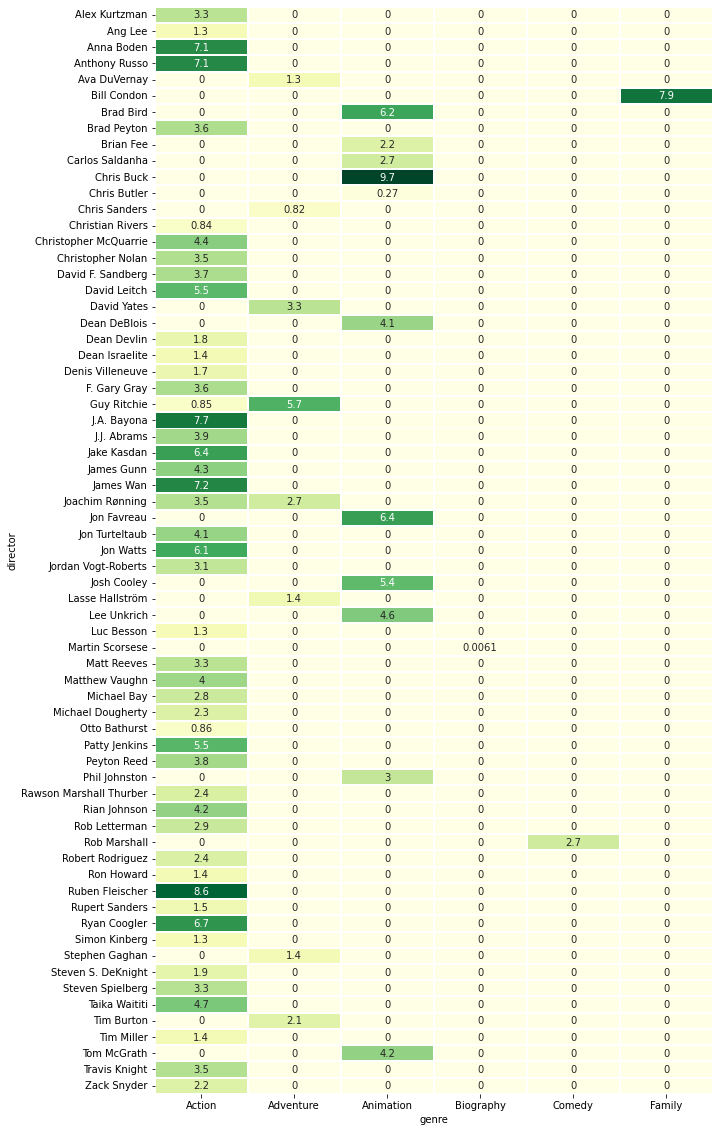

In [41]:
# heatmap
plt.figure(figsize=(10,20))
sns.heatmap(roi_df, annot=roi_df, cmap="YlGn", cbar=False, linewidths=1)
plt.show()

In the heatmap above, the darker the color of the cell the higher is the average return on investment for that director-genre combination. This chart can help us find out which director is most profitable in which genre.

### 4.2 Heatmap of Scores

Similar to the previous heatmap, this time we will create another heatmap of movie scores, given by the viewers, with repect to directors and genres.

In [42]:
score_df = pd.pivot_table(director_df, 
                          values ='score', 
                          index=['director'], 
                          columns='genre', 
                          aggfunc= np.mean)

In [43]:
score_df.head()

genre,Action,Adventure,Animation,Biography,Comedy,Family
director,,,,,,
Alex Kurtzman,5.4,NaN,NaN,NaN,NaN,NaN
Ang Lee,5.7,NaN,NaN,NaN,NaN,NaN
Anna Boden,6.8,NaN,NaN,NaN,NaN,NaN
Anthony Russo,8.4,NaN,NaN,NaN,NaN,NaN
Ava DuVernay,NaN,4.2,NaN,NaN,NaN,NaN


In [44]:
# replace missing values with zero
score_df = score_df.fillna(0)

Let's plot heatmap of movie scores.

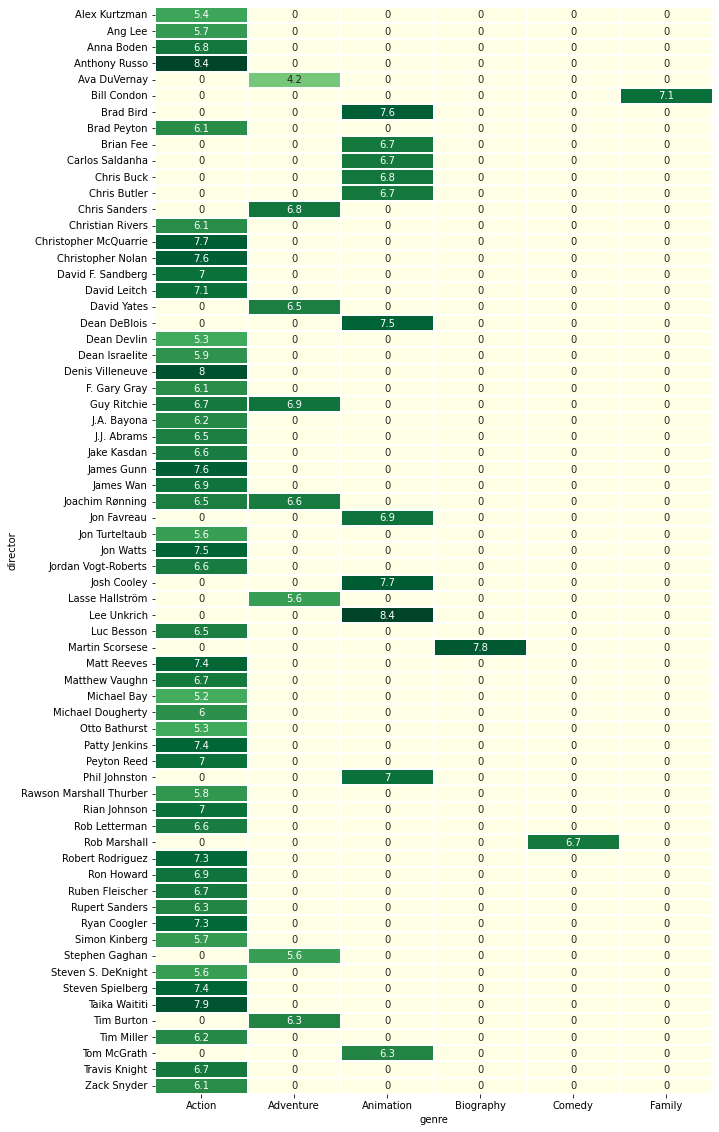

In [45]:
# heatmap
plt.figure(figsize=(10,20))
sns.heatmap(score_df, annot=score_df, cmap="YlGn", cbar=False, linewidths=1)
plt.show()

From the chart above, we can find out the higly rated directors in recent years across all the genres.

###4.3 Gross Collection vs Budget

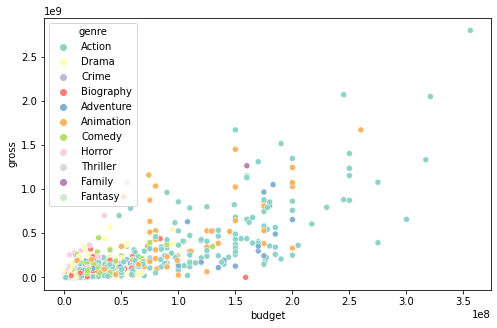

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(data = budget_gross_df, x = 'budget', y = 'gross', 
                hue = 'genre', palette='Set3')
plt.show()

Each data point in the chart above represents a movie, the colors represent the genres and on the axes we have budget and gross collection numbers. We can observe that only action and animation genre movies have been able to achieve record breaking collections even though their budgets are usually on the higher side.

###4.4 Return on investment (median) across ratings

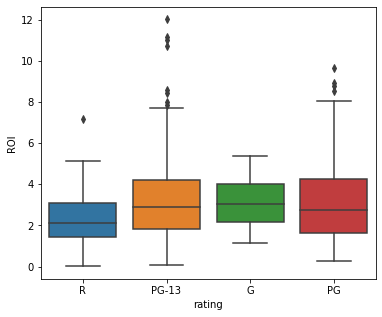

In [48]:
plt.figure(figsize=(6,5))

ax = sns.boxplot(data = year_gross_df, 
                 y = "ROI", 
                 x = "rating")

If we see the distribution of movies in terms of their ROI, then movies with PG-13 and PG ratings have a lot more chances of earning more money for the producers.

###4.5 Top 10 production companies based on ROI

First we will prepare a dataset for the plot. We will aggregate the ROI scores at companies level using the median values.

In [52]:
data = company_df.groupby(['company']).median().reset_index().sort_values('ROI', ascending= False).head(10)
data

,company,ROI
130,FaithStep Films,24.418755
51,Barunson E&A,22.711233
63,Blinding Edge Pictures,19.690012
242,Sailor Bear,19.516830
85,Carnival Film & Television,18.296927
0,"""Weathering With You"" Film Partners",17.428601
37,Atomic Monster,16.615986
210,Mooz Films,16.104251
53,Beijing Dengfeng International Culture Communi...,14.583177
175,Illumination Entertainment,14.301586


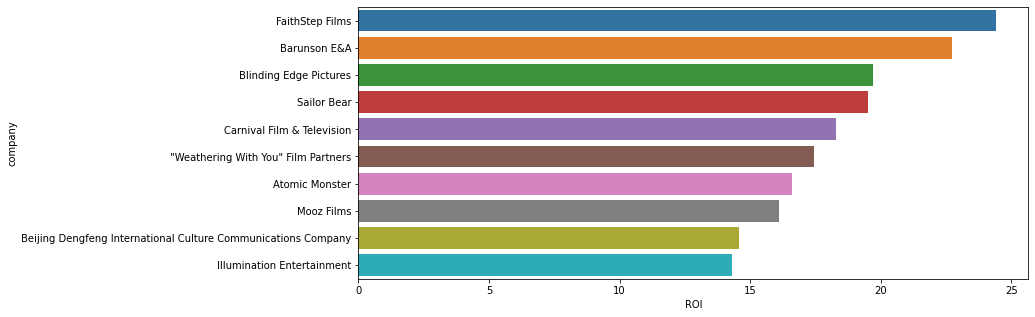

In [50]:
plt.figure(figsize = (12,5))
sns.barplot(data = data,
            y = "company", 
            x = "ROI")

plt.show()

The chart above shows the top 10 companies in the last five years based on the median values of return on investment.

# 5. Summary


* This data has been collected from 1980 onwards but for analysis we have     considered last 30 years i.e, 1990-2020. 


*  Some facts from the data exploration: 
1.   Maximum movies were realeased during 2000-2010. 
2.   Genres like comedy and horror have huge returns on investment. There is no  action, adventure, animation or sci-fi movie even in the top 20.
3. Top 3 most popular genres : comedy, action, and drama.
4. Action genre movies seem to get high number of votes followed by animation and sci-fi genres. Comedy and drama genres are not even in the top 10.
5. 'Biogrphy' genre: highest imdb rating so far
6. Genres like animation, action, adventure and sci-fi: maximum budget(due to high spending on CGI and VFX)
7. Chances of high returns (ROI): thriller, sci-fi, and horror.
8. 92% movies: released in US, Canada,UK and France
9. 7 minutes runtime increase.


*  As the patterns and preferences change over the years. Also in last decade there has been a tremendous change in technology and functionality of movie making. So for Deep analysis through subsets and visualization, more recent data has been considered.

1. Promising Director showing high ROI is John Watts and for promising production houses- Universal Pictures top the list. 
2. Action and Animation genres show: record breaking collection though with higher budget and PG-13 and PG rating movies being appreciated the most. 
3. Decade analysis over last 30 years show significant rise in Return on Investment (ROI). 


# 6. Recommendations

1. Based on the findings above, it seems that the best bet for a new movie would be to release a sci-fi or horror movie. These genres have a high return on investment, and are also popular with audiences. 

2. If the budget is too tight then go with the horror movie or else sci-fi is a good option.

3. If there is no budget concerns then Action will be the best approach. 

4. PG-13 and PG rating over other is recommended and movies can be released in US,Canada,UK and France for now and money on release in other nations. 

5. Promising directors can be Ruben fleiecher and Jay Bayona( for Action Genre) and  Chris Buck(for Animation). Few other recommendations include Anthony Russo, Denis Villenenve and Taika Waititi. 
